# ISING MODEL TIME EVOLUTION

## Qiskit Terra

In [1]:
# Catena di due spin in modello di Ising con campo trasverso
# si fissa J = 2b
# base spin singoli

from qiskit import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from qiskit import IBMQ

from qiskit.tools.monitor import job_monitor

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

my_api_token = 'bcb25f12c18f35132bbbdddff3541e5a6c06fc174db7bf7c1ac803a20864839b83af02d147b42091b3a461e68182a420a020ef637d69dfdcb96da500f630a909'
provider = IBMQ.enable_account(my_api_token)
IBMQ.get_provider(hub='ibm-q-education', group='uni-heidelberg-J', project='Solving-problems')
print('Initialization done')



C:\Users\Thanu\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:109: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Initialization done


In [2]:
BK = "hardware" # hardware, simulator
X=2
k=3

if BK == "simulator": 
    backend = Aer.get_backend('qasm_simulator')
    T = np.linspace(0,X,k)
    means_sim = []
    
elif BK == "hardware": 
    backend = IBMQ.get_provider(hub='ibm-q-education', group='uni-heidelberg-J', project='Solving-problems').get_backend('ibmq_bogota')
    T = np.linspace(0,X,k)
    means_hw = []

J = -1.0
b = 0.5

nShots = 8192
nTrot = 100
qbts = 2

q1 = 0
q2 = 1

for k in range(0,len(T)):
    
    qc = QuantumCircuit(qbts,qbts)
    
    # Trotter step definition
    delta = 1
    
    for j in range(0,int(T[k])):
        
        # single Trotter step circuit
        qc.rx(b*delta,q1)
        qc.rx(b*delta,q2)
        
        qc.cx(q1,q2)
        qc.rz(J*delta/2,q2)
        qc.cx(q1,q2)
        
        qc.barrier()

    # S_z^1 and S_z^2 measurement
    qc.measure([q1,q2],[0,1])
    
    job = execute(qc, backend=backend, shots=nShots)
    
    if BK == "hardware": job_monitor(job)
    
    result = job.result()
    counts = result.get_counts(qc)
    
    if "11" in counts and "00" in counts:
        mean = (counts["00"] - counts["11"])/nShots
    elif "00" in counts:
        mean = (counts["00"])/nShots
    elif "11" in counts:
        mean = -(counts["11"])/nShots
    else:
        mean = 0
     
    if BK == "simulator": means_sim.append(mean)
    elif BK == "hardware": means_hw.append(mean)
    

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [4]:
len(means_sim)

NameError: name 'means_sim' is not defined

In [5]:
len(means_hw)

3

NameError: name 'means_hw' is not defined

<Figure size 1080x720 with 0 Axes>

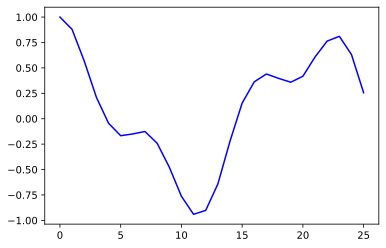

In [55]:
X=25
k=26

plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
# plt.xticks(T)
if means_sim != []:
    T = np.linspace(0,X,k)
    ax.plot(T, means_sim, 'b')
if means_hw != []: 
    T_hw = np.linspace(0,X,k)
    ax.plot(T_hw, means_hw, 'c')
ax.set(xlabel='T', ylabel='$S_z^1 + S_z^2$', title='Evoluzione temporale')
ax.grid()
plt.show()

qc.draw()

In [41]:
qc.draw()

┌─────────┐                       ░ ┌─────────┐                       ░ »
q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
c: 2/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
«     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
«q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
«     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
«     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
«q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
«     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
«     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
«q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
«     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
«     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
«q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
«     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
«     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
«q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
«     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0.5) ├──■────────────────■───░─┤ RX(0.5) ├──■────────────────■───░─»
«     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐ ░ »
«q_1: ┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─┤ RX(0.5) ├┤ X ├┤ RZ(-0.5) ├┤ X ├─░─»
«     └─────────┘└───┘└──────────┘└───┘ ░ └─────────┘└───┘└──────────┘└───┘ ░ »
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌─────────┐                       ░ ┌─────────┐                       ░ »
«q_0: ┤ RX(0

In [ ]:
np.linspace(0, 24, 25)
